In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv(r'C:/Users/gunja/Desktop/loan_prediction/train.csv')

# DataFrame Navigation

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.index

RangeIndex(start=0, stop=614, step=1)

In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Numerical_Value Exploration

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [19]:
# Outlier removal technique using Normal Distribution and Std Deviation

In [6]:
x= data['LoanAmount']

In [10]:
x.replace(np.NaN, 120, inplace=True)

In [13]:
mean = np.mean(x)

In [14]:
sd = np.std(x)

In [31]:
final = [x for x in x if (x > mean - 2 * sd)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
final_list = [x for x in x if (x< mean + 2 * sd)]

In [18]:
print(final_list)

[349.0, 315.0, 320.0, 370.0, 650.0, 600.0, 700.0, 495.0, 330.0, 436.0, 480.0, 376.0, 490.0, 570.0, 380.0, 360.0, 405.0, 500.0, 480.0, 480.0, 400.0, 324.0, 600.0, 350.0, 496.0]


In [22]:
dd = data.copy()

In [27]:
mean = np.mean(dd, axis=1)

In [28]:
sd = np.std(dd, axis=1)

In [30]:
final_list = [x for x in dd if (x > mean - 2 * sd)]

TypeError: invalid type comparison

# Categorical_Value Exploration

In [9]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [12]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [13]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [15]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [20]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [21]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Distribution Analysis


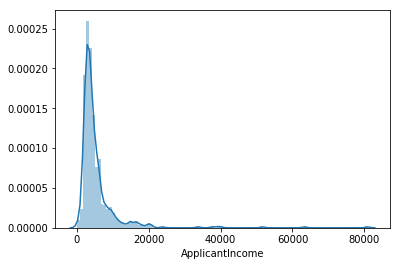

In [23]:
sns.distplot(data['ApplicantIncome'], bins=100, hist= True)

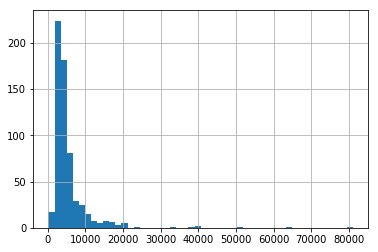

In [24]:
data['ApplicantIncome'].hist(bins=50)

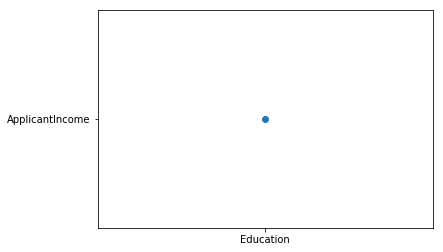

In [12]:
plt.scatter(x='Education',y='ApplicantIncome')

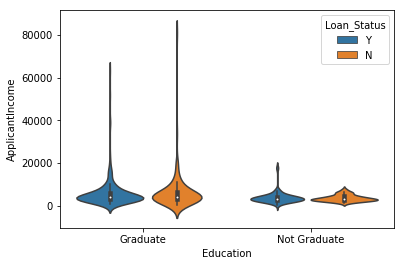

In [18]:
sns.violinplot(x='Education',y='ApplicantIncome', hue= 'Loan_Status', data=data)

ValueError: could not convert string to float: 'N'

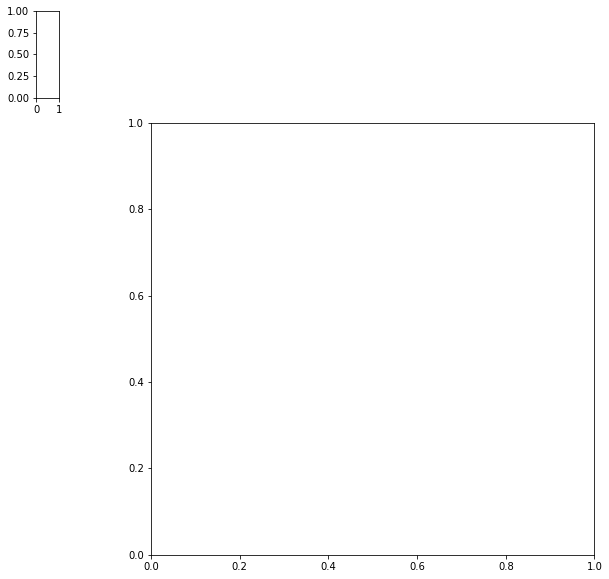

In [19]:
sns.clustermap(data, method='average')

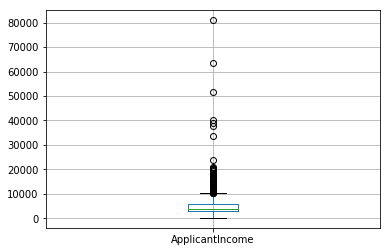

In [25]:
data.boxplot(column='ApplicantIncome')

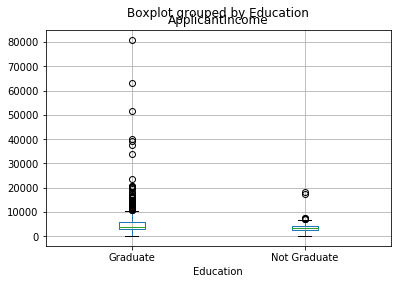

In [26]:
data.boxplot(column='ApplicantIncome', by='Education')
plt.show()

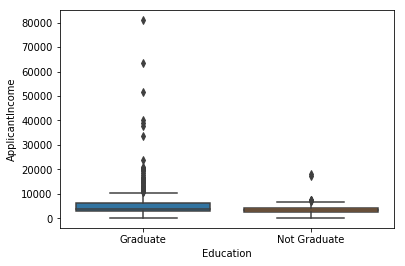

In [27]:
sns.boxplot(x='Education', y='ApplicantIncome', data=data)
plt.show()

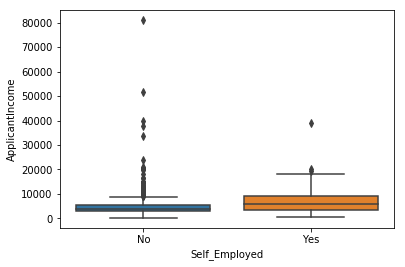

In [28]:
sns.boxplot(x='Self_Employed', y='ApplicantIncome', data=data)
plt.show()

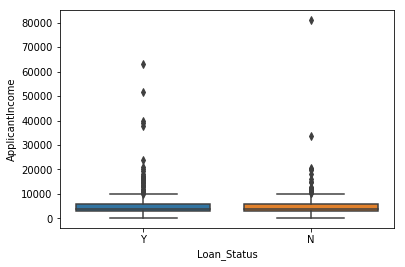

In [29]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=data)
plt.show()

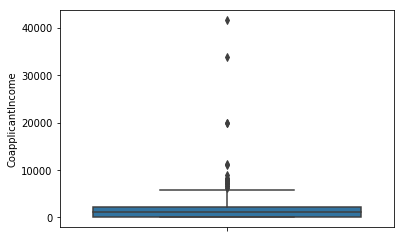

In [30]:
sns.boxplot(data['CoapplicantIncome'], orient='v')
plt.show()

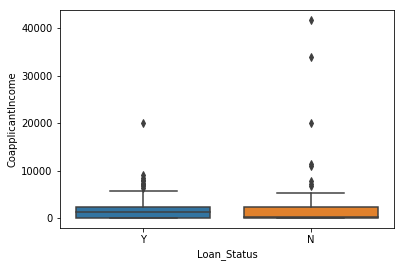

In [31]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=data)
plt.show()

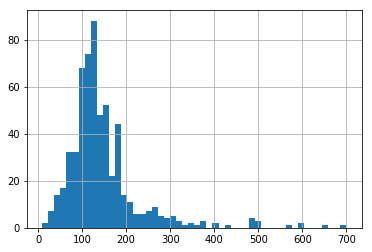

In [32]:
data['LoanAmount'].hist(bins=50)
plt.show()

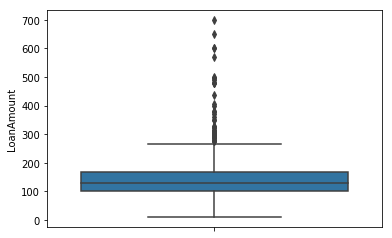

In [33]:
sns.boxplot(data['LoanAmount'], orient='v')
plt.show()

# Categorical_Value Analysis 

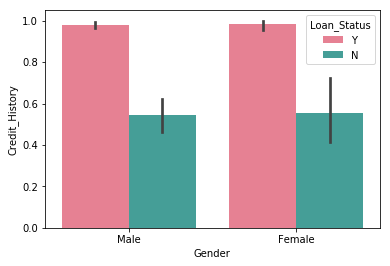

In [34]:
sns.barplot(y='Credit_History', x='Gender', hue='Loan_Status', data=data, palette='husl')
plt.show()

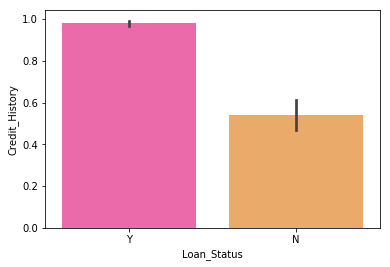

In [35]:
sns.barplot(x='Loan_Status', y='Credit_History', data=data, palette='spring')
plt.show()

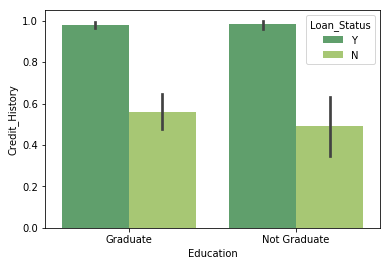

In [36]:
sns.barplot(y='Credit_History', x='Education', hue='Loan_Status', data=data, palette='summer')
plt.show()

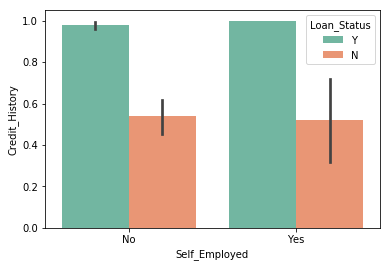

In [37]:
sns.barplot(y='Credit_History', x='Self_Employed', hue='Loan_Status', data=data, palette='Set2')
plt.show()

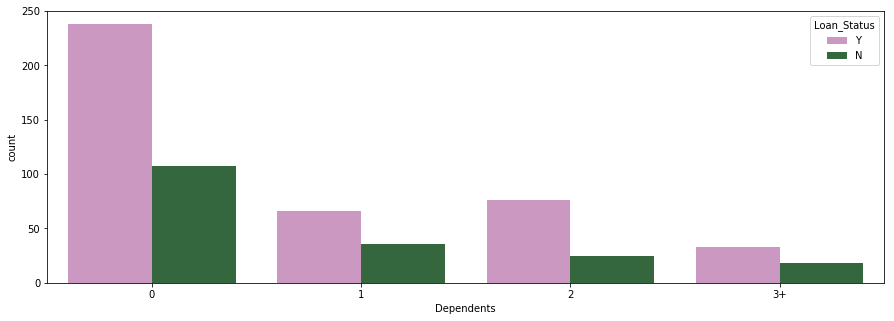

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=data, palette='cubehelix_r')
plt.show()

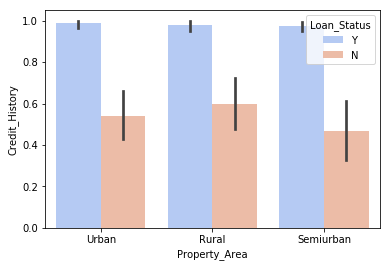

In [39]:
sns.barplot(x='Property_Area', y='Credit_History', hue='Loan_Status', data=data, palette='coolwarm')
plt.show()

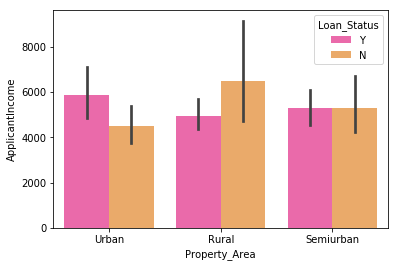

In [40]:
sns.barplot(x='Property_Area', y='ApplicantIncome', hue='Loan_Status', data=data, palette='spring')
plt.show()

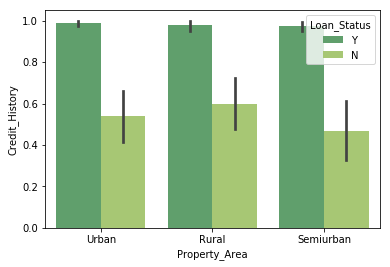

In [41]:
sns.barplot(x='Property_Area', y= 'Credit_History', hue='Loan_Status', data=data, palette='summer')
plt.show()

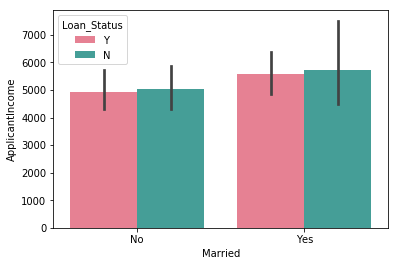

In [42]:
sns.barplot(x='Married', y='ApplicantIncome',hue='Loan_Status', data=data, palette='husl')
plt.show()

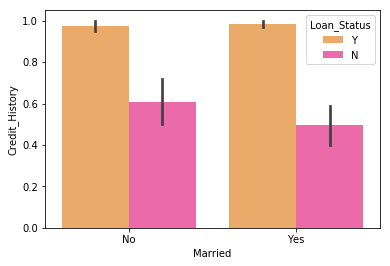

In [43]:
sns.barplot(x='Married', y='Credit_History', hue='Loan_Status', data=data, palette='spring_r')
plt.show()

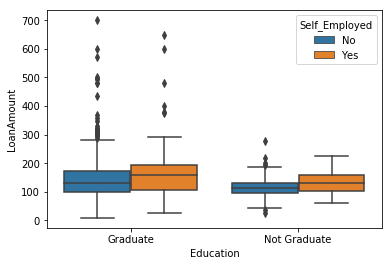

In [44]:
sns.boxplot(x='Education',y='LoanAmount', hue='Self_Employed', data=data)
plt.show()

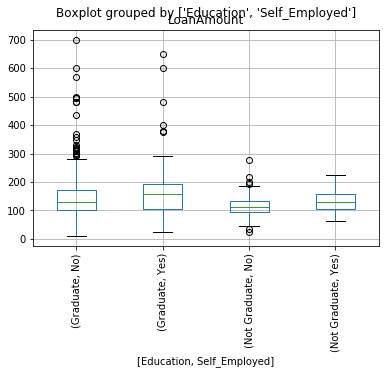

In [45]:
data.boxplot(column='LoanAmount', by=['Education','Self_Employed'])
plt.xticks(rotation='vertical')
plt.show()

# Data_Preprocessing/Munging

In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
data['Dependents'].fillna('0', inplace=True)

In [18]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [21]:
data.replace('\+','', regex=True, inplace=True)

In [44]:
data['Dependents'].replace('+','',inplace=True)

In [22]:
data['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [48]:
 data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [49]:
data.LoanAmount.unique()

array([146.41216216, 128.        ,  66.        , 120.        ,
       141.        , 267.        ,  95.        , 158.        ,
       168.        , 349.        ,  70.        , 109.        ,
       200.        , 114.        ,  17.        , 125.        ,
       100.        ,  76.        , 133.        , 115.        ,
       104.        , 315.        , 116.        , 112.        ,
       151.        , 191.        , 122.        , 110.        ,
        35.        , 201.        ,  74.        , 106.        ,
       320.        , 144.        , 184.        ,  80.        ,
        47.        ,  75.        , 134.        ,  96.        ,
        88.        ,  44.        , 286.        ,  97.        ,
       135.        , 180.        ,  99.        , 165.        ,
       258.        , 126.        , 312.        , 136.        ,
       172.        ,  81.        , 187.        , 113.        ,
       176.        , 130.        , 111.        , 167.        ,
       265.        ,  50.        , 210.        , 175.  

In [46]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Dependents']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [47]:
data['Dependents'].unique()

array([0, 1, 2, 3], dtype=int64)